<a href="https://colab.research.google.com/github/larinsi/DS0P/blob/main/Machine_learning_Middle_level_Neural_networks/03_Neural_networks_in_practice/keras_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по определению моделей в Keras

В каждом из заданий ниже, реализуйте модель, повторяющую архитектуру на приложенной картинке. При определении моделей, можете использовать как Sequential так и Functional API.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

## Задание 1

Реализуйте модель описанную ниже. Активацию последнего слоя сделайте "softmax".

<img src="https://drive.google.com/uc?export=view&id=1QCKcPlmguNNXPvUQnUaphcfOTWvQKzEW" width=200>
<img src="https://drive.google.com/uc?export=view&id=1r6DoTrn8Pe2RKuPT3RM9rR8Xc2X3WNVe" width=400>


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 44        
                                                                 
 dense_18 (Dense)            (None, 8)                 40        
                                                                 
 dense_19 (Dense)            (None, 16)                144       
                                                                 
 dense_20 (Dense)            (None, 3)                 51        
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


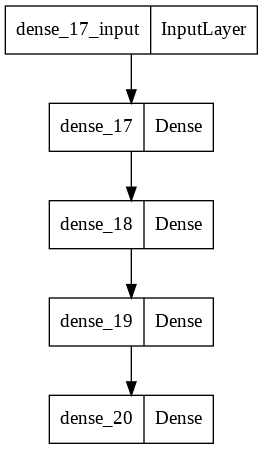

In [7]:
from os import name
# <YOUR CODE STARTS HERE >
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(10, ), name="dense_17_input"))
model.add(Dense(4, name="dense_17"))
model.add(Dense(8, name="dense_18"))
model.add(Dense(16, name="dense_19"))
model.add(Dense(3, name="dense_20", activation="softmax"))

# <YOUR CODE ENDS HERE >
model.summary()
tf.keras.utils.plot_model(model, show_shapes=False)

In [8]:
output = model(np.ones((3, 10)))
assert np.allclose(output.numpy().sum(1),  np.ones(3)), "Did you forget softmax in the last layer?"
assert model.count_params() == 279, "Wrong params number"
print("Simple tests passed")

Simple tests passed


## Задание 2

Реализуйте модель описанную ниже.

<img src="https://lh3.googleusercontent.com/Aa_RCQNbksP9j27Br0kbq-Aj_yWHW3fofmaZj6jOm8xBLgWrEn60MbxVBkfZipLJ5mI3LAMC9wdhv08i76oKY6cQzUdYVHyRzLV4dZ8Yw-TIC6Y82gLe1zmdwzpX2JkFmo-nJy6YPLGiZuqkjKJlTdtHdFdDuIp_akK2fSMEMf85u3_3N-Gx6XSTxaQsCX5PL8aWlNeDl5rpHhmQYBTe1TR2-EDsAMgz4CLBMwyhVPJwjBR57WOBw14NPp6RrayuaPSltd9qbvQG2236WKqyL0w__y6tR6Vg7WMtUm4SKrPbTSUUyEEvU1hH6Z6yQpgyRRXecdupmTyx3FySqgERRVIqEb-JNoLppqzcaBEHDKdi0I7tQuuKXVyjSq5P02McLEwR7ej3dKVC8R3EsFDZV8uVLWJQSdpvInhp5d0fGb5u-UOfRuJ1X_4s2A6BJPbWbj4NyQAWPFem02A2Ya4CpzgDbMnjiAmlt_-JavcPCi7UALu6mH_RzPgNkzlrSqEMHpdBnVs6vhtEQGoZU1kxARvZxfBnbXTudg0IYjZ-LBKEfEFRwN3pbC3A9xnPS_-LRXcvAy45VSgH_JgPV4PpBFwo-xVg6O1RUhbOBuR8_a9OOyLd2zN8NaLO4e4bxq8pHD9mIXXBrxxCK76pjO5Vs2m03h-U7o6VTci3Fr9U5f2rF4ejP_7pNtSwfZ3RRA=w646-h220-no?authuser=0" width=400>
<img src="https://drive.google.com/uc?export=view&id=1vR3XfyYEpSmgEXZoLGY_FfWRwgOiefoj" width=300>


*Кстати, такая кострукция не лишена смысла -- в следующем модуле мы увидим как она помогла совершить прорыв в классификации изображений. Она носит название residual block*

Подсказка: на последнем слое используйте метод `Add()` класса layers, на вход которому нужно подать массик из `input_layer` и `l1_output`.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 add_2 (Add)                    (None, 10)           0           ['InputLayer[0][0]',             
                                                                  'Layer1[0][0]']                 
                                                                                                  
Total params: 110
Trainable params: 110
Non-trainable params: 0
____________________________

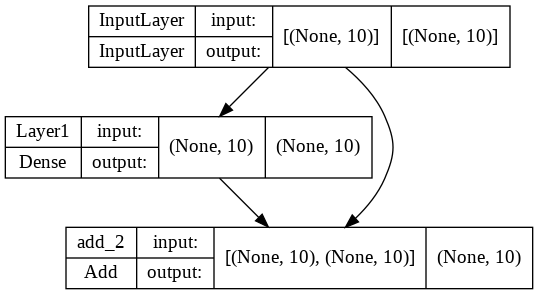

In [10]:
# <YOUR CODE STARTS HERE >
model = tf.keras.Sequential()
input_layer = tf.keras.Input(shape=(10, ), name="InputLayer")
layer1_output = Dense(10, name="Layer1")(input_layer)

output = tf.keras.layers.Add(name="add_2")([input_layer, layer1_output])

model = tf.keras.Model(inputs=input_layer, outputs=output)

# <YOUR CODE ENDS HERE >
model.summary()
assert model.count_params() == 110, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=True)

## Задание 3

Реализуйте модель описанную ниже. Вам пригодится tf.keras.layers.Concatenate.

<img src="https://drive.google.com/uc?export=view&id=1LvsTd2a0HW-duuv3UyxCBLmERpqQQweU" width=450>
<img src="https://drive.google.com/uc?export=view&id=18IMatPWKG-0T9gisyJ_k465mospO_xow" width=400>


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 Layer2 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 Layer3 (Dense)                 (None, 10)           110         ['Layer1[0][0]']                 
                                                                                            

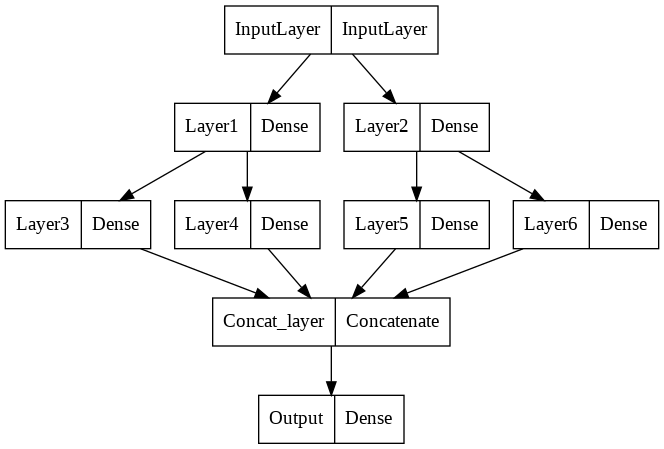

In [12]:
# <YOUR CODE STARTS HERE >
input_layer = tf.keras.Input(10, name="InputLayer")

layer_1 = Dense(10, name="Layer1")(input_layer)
layer_2 = Dense(10, name="Layer2")(input_layer)

layer_3 = Dense(10, name="Layer3")(layer_1)
layer_4 = Dense(10, name="Layer4")(layer_1)
layer_5 = Dense(10, name="Layer5")(layer_2)
layer_6 = Dense(10, name="Layer6")(layer_2)

concat_layer = tf.keras.layers.Concatenate(name="Concat_layer")([layer_3, layer_4, layer_5, layer_6])

output = Dense(3, name="Output")(concat_layer)
model = tf.keras.Model(inputs=input_layer, outputs=output)

# <YOUR CODE ENDS HERE >

model.summary()
assert model.count_params() == 783, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=False)